# Simple Linear Regression. Minimal Example with basic Neural Network

## Import the relevent libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data to train on

In [2]:
observations=1000

xs=np.random.uniform(low=-10,high=10,size=(observations,1))
xz=np.random.uniform(low=-10,high=10,size=(observations,1))
inputs=np.column_stack((xs,xz))
print(inputs.shape)

(1000, 2)


## Create the targets we will aim at
- $targets=f(x,z)=2*x-3*z+5+noise$

In [3]:
noise=np.random.uniform(-1,1,(observations,1))
targets=2*xs-3*xz+5+noise
print(targets.shape)

(1000, 1)


## Plot the training data

In [4]:
targets=targets.reshape(observations,1)

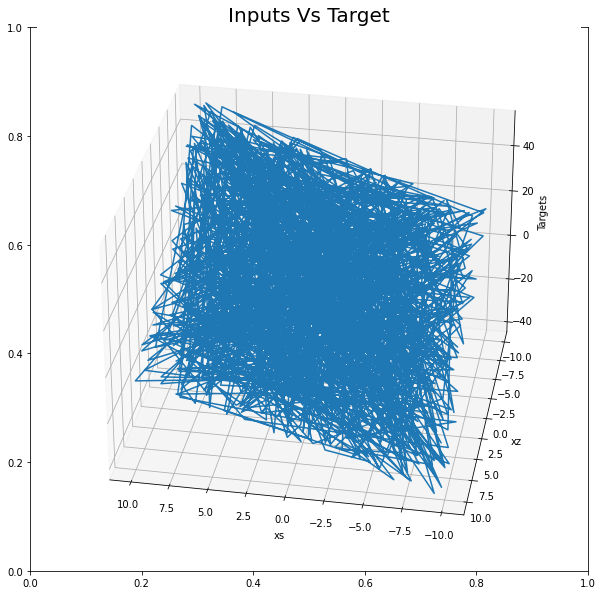

In [5]:
fig=plt.figure(figsize=(10,10))
plt.title('Inputs Vs Target',fontsize=20)
ax=fig.add_subplot(111,projection='3d')
ax.plot(xs,xz,targets)
ax.set_xlabel('xs')
ax.set_ylabel('xz')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets=targets.reshape(observations,1)

## Initialize variables
- weights=random intial weights of weight and biases
- we have single output, two no of inputs and one bias to complete regression

In [6]:
init_range=0.1
weights=np.random.uniform(-init_range,init_range,size=(2,1))
bias=np.random.uniform(-init_range,init_range,size=1)
print(weights)
print(bias)

[[-0.05247155]
 [ 0.05752953]]
[8.95392783e-05]


## Set a learning rate

In [7]:
learning_rate=0.02

## Train the model
- our main objective here is to minimize loss function
- with minimum loss fuction we can deteremine the closest fit coefficients and bias
- Delta=>            $\delta=target output-predicted output$
- L2 Loss function=> $Loss=\sum\delta^2/(2*no of observations))$
- weights=>          $Updated weight=weight-\eta*(input*\delta)$

In [8]:
for i in range(200):
    outputs=np.dot(inputs,weights)+bias
    deltas=outputs-targets
    L2_loss=np.sum(deltas*2)/2/observations
    print(L2_loss)
    deltas_scaled=deltas/observations
    weights=weights-learning_rate*np.dot(inputs.T,deltas_scaled)
    bias=bias-learning_rate*np.sum(deltas_scaled)

-5.950003745657742
-5.188584114550662
-4.881355671177047
-4.719348881072731
-4.604663829190402
-4.506249694656188
-4.4142364776542555
-4.325468513252485
-4.2389199669632
-4.1542412992420035
-4.071298169830927
-3.9900250758470537
-3.910378856831834
-3.832323907809585
-3.755827466748331
-3.6808581054701386
-3.607385240175878
-3.5353789669212436
-3.4648100008758744
-3.3956496488773373
-3.327869792787773
-3.261442876465189
-3.1963418940471366
-3.132540378806182
-3.0700123923365346
-3.0087325139915797
-2.9486758305435568
-2.8898179260533197
-2.8321348719434773
-2.7756032172700853
-2.72019997918864
-2.6659026336104237
-2.6126891060453667
-2.560537762627705
-2.5094274013207634
-2.45933724329731
-2.4102469244919544
-2.3621364873221826
-2.3149863725746265
-2.2687774114533066
-2.223490817786589
-2.179108180389704
-2.135611455579704
-2.0929829598398455
-2.0512053626303794
-2.010261679342855
-1.970135264395054
-1.9308098044637614
-1.8922693118526097
-1.854498117992312
-1.8174808670706297
-1.781202

## Print weights and biases and see if we have worked correctly

In [9]:
print(weights,bias)

[[ 1.99646167]
 [-2.99189985]] [4.93055739]


## Plot last outputs vs targets

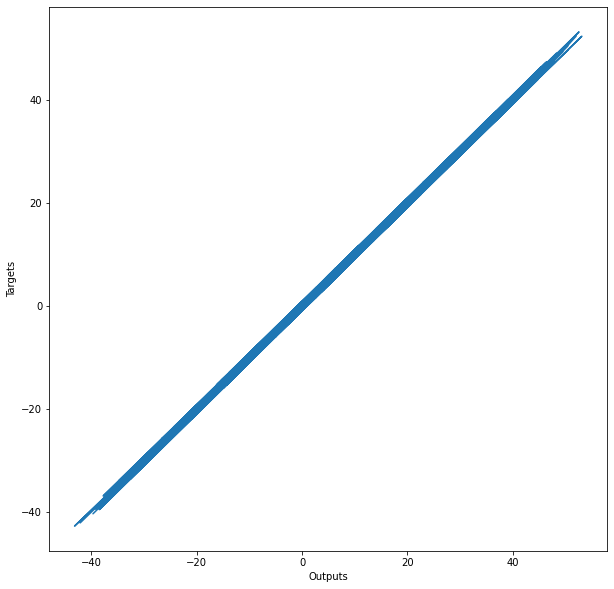

In [10]:
plt.figure(figsize=(10,10))
plt.plot(outputs,targets)
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()

- As we can see the outputs and targets are at $45^{\circ}$, our predicted values match the targets.